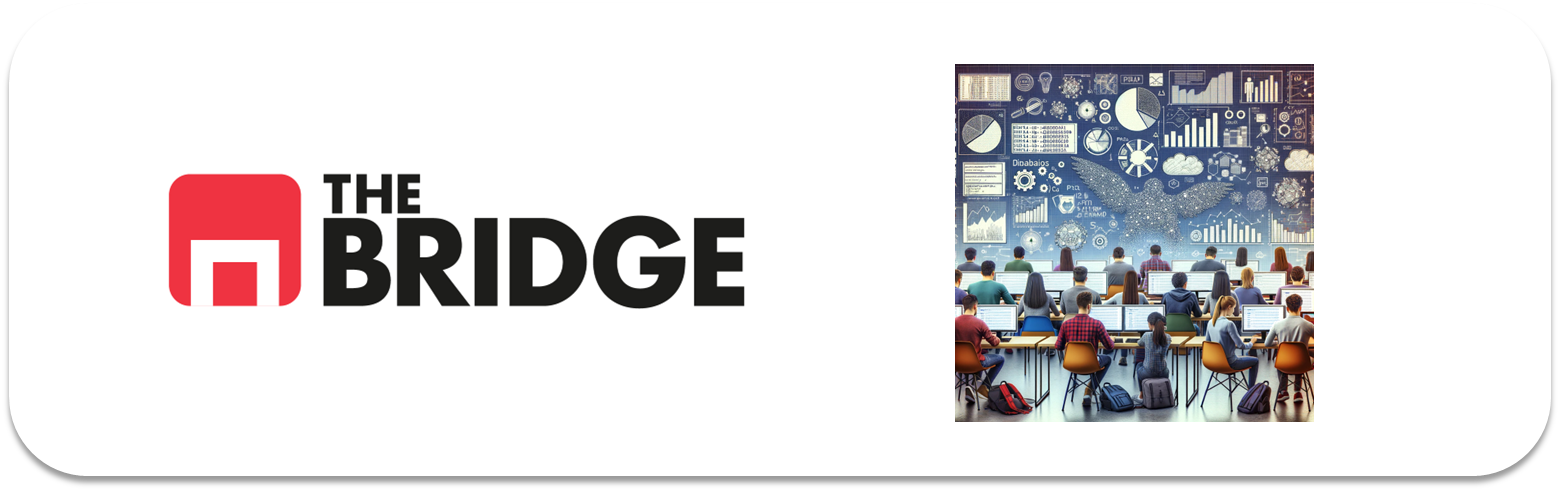

## TEAM CHALLENGE: TOOLBOX (I)

Este notebook describe la primera parte del team challenge dedicado a construir un módulo de herramientas básicas para poder preparar la creación de modelos de Machine Learning de una forma más sencilla. 

En esta primera parte, el grupo debe crear un conjunto de funciones que se describen a continuación y crear con ellas un módulo en script "toolbox_ML.py".

Este módulo se empleará en la segunda parte del challenge para resolver un problema de Machine Learning.

### Entregables
Por lo tanto, **se pide:**  
**1. Entregar un script "toolbox_ML.py" que contenga el código comentado que implemente las funciones descritas y especificadas en el apartado [fuciones]. La entrega se hará en el repositorio del grupo.**  
**2. Hacer una descripción del código creado en una breve presentación de 10-15 minutos, empleando para ello un ejemplo diseñado por el grupo**  
**3. Entregar el código del ejemplo (esto debería ser un notebook, pero puede ser también un script) también en el repositorio del grupo**  

### Plazos
Tendremos 2 sesiones de team challenge para crear el código y una sesión de presentación.  
Debéis entregar en enlace al repositorio via mail a ta_ds2_online@thebridgeonline.es el día anterior a la presentación (hora límite 17:00h)
- Turno de mañana: Entrega 28 de enero / Presentación 29 de enero
- Turno de tarde: Entrega 30 de enero / Presentación 31 de enero



### Funciones

El objetivo de las funciones que se especifican a continuación es ayudar a realizar el análisis y selección de features de la forma más flexible y rápida posible, dado un problema de Machine Learning concreto.

**Todas las funciones deben llevar comentado el código y deben incluir un docstring especificando su uso**, según la siguiente guía:

Un "docstring" en Python es una cadena de texto utilizada para documentar módulos, clases, métodos y funciones. El propósito de un docstring es explicar brevemente qué hace la función y cómo se debe utilizar. Los docstrings se encierran entre tres comillas dobles (""") al inicio y al final, y se colocan justo después de la definición de la función. Aquí hay un formato típico de un docstring para una función en Python:

```python
def mi_funcion(param1, param2):
    """
    Descripción breve de lo que hace la función.

    Argumentos:
    param1 (tipo): Descripción de param1.
    param2 (tipo): Descripción de param2.

    Retorna:
    tipo: Descripción de lo que retorna la función.
    """
    
    # El cuerpo de la función va aquí
    pass
```

En este formato:

1. **Primera línea**: Breve descripción de la función.
2. **Sección de Argumentos**: Lista cada parámetro, su tipo esperado y una breve descripción de su propósito.
3. **Sección de Retorna**: Describe el tipo y el propósito del valor que la función retorna.



### Funcion: describe_df

Esta función debe recibir como argumento un dataframe y debe devolver una dataframe como el de la imagen (no el de la imagen). Es decir un dataframe que tenga una columna por cada columan del dataframe original y como filas, los tipos de las columnas, el tanto por ciento de valores nulos o missings, los valores únicos y el porcentaje de cardinalidad. 

La figura muestra el resultado esperado de llamar a la función pedida con el dataset del titanic:
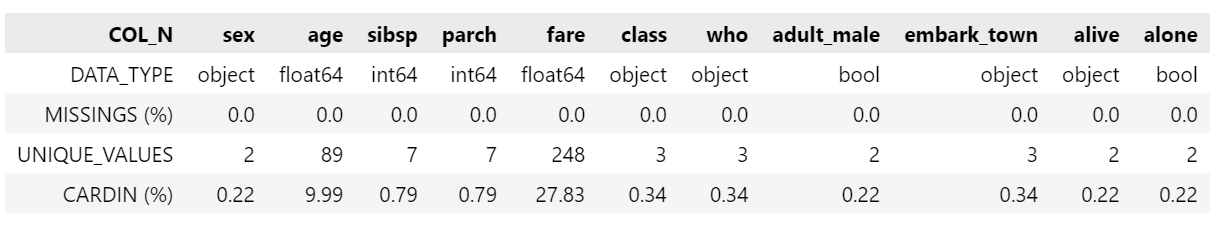
    

### Funcion: tipifica_variables

Esta función debe recibir como argumento un dataframe, un entero (`umbral_categoria`) y un float (`umbral_continua`). La función debe devolver un dataframe con dos columnas "nombre_variable", "tipo_sugerido" que tendrá tantas filas como columnas el dataframe. En cada fila irá el nombre de una de las columnas y una sugerencia del tipo de variable. Esta sugerencia se hará siguiendo las siguientes pautas:
+ Si la cardinalidad es 2, asignara "Binaria"
+ Si la cardinalidad es menor que `umbral_categoria` asignara "Categórica"
+ Si la cardinalidad es mayor o igual que `umbral_categoria`, entonces entra en juego el tercer argumento:
    * Si además el porcentaje de cardinalidad es superior o igual a `umbral_continua`, asigna "Numerica Continua"
    * En caso contrario, asigna "Numerica Discreta"


In [33]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
dataframe= pd.read_csv("../data/dataset_viajes_jun23.csv")

In [35]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aircompany  600 non-null    object 
 1   origen      600 non-null    object 
 2   destino     600 non-null    object 
 3   distancia   600 non-null    int64  
 4   avion       600 non-null    object 
 5   con_escala  600 non-null    bool   
 6   consumo_kg  600 non-null    float64
 7   duracion    600 non-null    int64  
 8   ingresos    600 non-null    float64
 9   id_vuelo    600 non-null    object 
 10  mes         600 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 47.6+ KB


In [36]:
dataframe.nunique()

aircompany      5
origen         11
destino        11
distancia      45
avion           4
con_escala      2
consumo_kg    501
duracion      113
ingresos      600
id_vuelo      347
mes             1
dtype: int64

### Funcion: get_features_num_regression

Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad, además de un argumento 'umbral_corr', de tipo float que debe estar entre 0 y 1 y una variable float "pvalue" cuyo valor debe ser por defecto "None".

La función debe devolver una lista con las columnas numéricas del dataframe cuya correlación con la columna designada por "target_col" sea superior en valor absoluto al valor dado por "umbral_corr". Además si la variable "pvalue" es distinta de None, sólo devolvera las columnas numéricas cuya correlación supere el valor indicado y además supere el test de hipótesis con significación mayor o igual a 1-pvalue.

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

### Funcion: plot_features_num_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un valor de correlación ("umbral_corr", con valor 0 por defecto) y un argumento ("pvalue") con valor "None" por defecto.

Si la lista no está vacía, la función pintará una pairplot del dataframe considerando la columna designada por "target_col" y aquellas incluidas en "column" que cumplan que su correlación con "target_col" es superior en valor absoluto a "umbral_corr", y que, en el caso de ser pvalue diferente de "None", además cumplan el test de correlación para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

EXTRA: Se valorará adicionalmente el hecho de que si la lista de columnas a pintar es grande se pinten varios pairplot con un máximo de cinco columnas en cada pairplot (siendo siempre una de ellas la indicada por "target_col")

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_num_regresion`

### Funcion: get_features_cat_regression



Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad y una variable float "pvalue" cuyo valor por defecto será 0.05.

La función debe devolver una lista con las columnas categóricas del dataframe cuyo test de relación con la columna designada por 'target_col' supere en confianza estadística el test de relación que sea necesario hacer (es decir la función debe poder escoger cuál de los dos test que hemos aprendido tiene que hacer).

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [37]:
dataframe = dataframe.drop(columns=["mes"])

In [38]:
def get_features_num_regression(dataframe,target_col,umbral_corr: float,pvalue=None,umbral_cat=20):
    """
    Esta función Selecciona las columnas numéricas de un DataFrame cuya correlación con la columna Target
    sea superior al umbral especificado. De manera opcional, aplica un test de hipótesis para asegurar que las
    correlaciones son estadísticamente significativas.

    Argumentos:
    dataframe (pd.DataFrame): DataFrame de entrada que contiene las variables a analizar.
    target_col (str): Nombre de la columna objetivo (debe ser numérica continua).
    umbral_corr (float): Umbral mínimo de correlación en el rango [0,1].
    pvalue (float, opcional): Nivel de significancia estadística. Si es None, no se aplica el test de hipótesis.

    Retorna:
    list: Lista de columnas numéricas que cumplen con el criterio de correlación y, si se especifica,
          la significancia estadística.
    """
    #COMPROBACION DE QUE LOS VALORES INTRODUCIDOS CUMPLEN CON LOS REQUISITOS
    if not isinstance(umbral_cat, int):
        print("El argumento 'umbral_cat' debe ser de tipo int")
        return None
    card_targ=dataframe[target_col].nunique()
    if (dataframe[target_col].dtype not in [np.int64, np.float64]) or card_targ<umbral_cat:
        print("La columna target debe ser numerica continua. types validos: [int64,float64]")
        return None
    elif not isinstance(umbral_corr, float) or not (0 <= umbral_corr <= 1):
        print("El argumento 'umbral_corr' debe ser de tipo float y estar entre los valores [0,1]")
        return None
    elif pvalue is not None and (not isinstance(pvalue, float) or not (0 <= pvalue <= 1)):
        print("El argumento 'pvalue' debe ser None o de tipo float y estar entre los valores [0,1]")
        return None
    
    else:
        #ESTUDIO DE LA CORRELACION ENTRE LAS COLUMNAS NUMERICAS Y LA TARGET_COL.
        numericas= dataframe.drop(columns=target_col).select_dtypes(include=[np.number]).columns.tolist()
        features_num=[]
        print(f"La correlacion entre las columnas numericas y el target debe superar: {umbral_corr}")
        print("---------------------------------------------------------------------------")

        for col in numericas:
            if dataframe[col].isnull().sum() > 0:
                print(f"Advertencia: La columna <{col}> contiene valores nulos, no será tenida en cuenta.")
                continue
            correlation_w_target=dataframe[col].corr(dataframe[target_col])
            print(f"<{col}> corr con target: {correlation_w_target}")
            if np.abs(correlation_w_target)>=umbral_corr:
                features_num.append(col)

        #ESTUDIO DE LA SIGNIFICANCIA ESTADISTICA DE LAS CORRELACIONES.
        features_num_filtrada = features_num[:]
        if pvalue is not None:
            features_num_filtrada=[]
            nivel_significancia = 1 - pvalue
            print("\n¿Es la correlacion estadisticamente significativa?")
            print("---------------------------------------------------------------------------")
            for col in features_num:
                corr, valor_p = pearsonr(dataframe[col], dataframe[target_col])
                if valor_p < nivel_significancia:
                    features_num_filtrada.append(col)
                    print(f"<{col}>: {valor_p} Si")
                else:
                    print(f"<{col}>: No")

    return features_num_filtrada
            

In [39]:
def get_features_cat_regression(dataframe, target_col, pvalue=0.05):
    """
    Identifica las columnas categóricas en un DataFrame que tienen una relación significativa con una columna objetivo numérica, basada en un nivel de confianza estadístico.

    Argumentos:
    -Dataframe: El conjunto de datos que contiene las columnas a analizar.
    -Target: El nombre de la columna objetivo, que debe ser numérica.
    -pvalue: El nivel de significación estadística para considerar una relación significativa
                

    Retorna: Una lista con los nombres de las columnas categóricas que tienen una relación estadísticamente significativa con la columna objetivo.
    """
    #Verifica si target_col es numérica
    if (dataframe[target_col].dtype not in [np.int64, np.float64]):
        print(f"La columna '{target_col}' no es numérica.")
        return None

    #Verifica la cardinalidad de target_col
    if dataframe[target_col].nunique() < 20:
        print("La columna objetivo debe tener al menos 20 valores únicos.")
        return None

    #Verifica si pvalue está en el rango válido
    if not (0 < pvalue <= 1):
        print("El valor de 'pvalue' debe estar entre 0 y 1.")
        return None

    #Filtra las columnas categóricas
    cat_columns = [col for col in dataframe.columns if dataframe[col].dtype == 'object' or isinstance(dataframe[col].dtype, pd.CategoricalDtype)]

    #Aplica pruebas estadísticas para determinar la relación
    related_columns = []
    for col in cat_columns:
                
        try:
            dataframe[col] = dataframe[col].fillna("Desconocido")
            # Realiza ANOVA para evaluar la relación entre la categórica y la numérica
            groups = [dataframe[dataframe[col] == category][target_col] for category in dataframe[col].unique()]
            stat, p = f_oneway(*groups)

            # Agrega columna si el p-valor es menor al nivel de significación
            if p < pvalue:
                related_columns.append(col)
        except Exception as e:
            print(f"No se pudo evaluar la columna '{col}': {e}")
            print("Columnas categóricas significativamente relacionadas con la columna objetivo:")
    
    return related_columns



In [40]:
#prueba

target_col = "ingresos"  



test_get_features_cat_regression = get_features_cat_regression(dataframe, target_col=target_col, pvalue = 0.05)

test_get_features_cat_regression


['aircompany', 'origen', 'destino', 'avion', 'id_vuelo']

In [41]:
dataframe.head()


,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747


In [42]:
#dataframe = dataframe.drop(columns=["aircompany", "origen", "destino", "avion", "con_escala", "id_vuelo", "mes"])

### Funcion: plot_features_cat_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un argumento ("pvalue") con valor 0.05 por defecto y un argumento "with_individual_plot" a False.

Si la lista no está vacía, la función pintará los histogramas agrupados de la variable "target_col" para cada uno de los valores de las variables categóricas incluidas en columns que cumplan que su test de relación con "target_col" es significatio para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_cat_regression`.

In [73]:
def plot_features_cat_regression(dataframe, target_col="", columns=[], pvalue=0.5, with_individual_plot= False):
    '''La función recibe un dataframe y analiza las variables categoricas significativas con la variable target, si no detecta variables categoricas significativas, ejecuta analisis de variables numericas significativas con target mostrando histograma de los datos
    
    Argumento: 
    1. dataframe: DataFrame a analizar
    2. target_col: variable objetivo de estudio
    3. columns: por defecto vacia, son las variables categoricas a analizar. 
    3. pvalue: pvalue que por defecto se establece en 0.5
    4. with_indivual_plot : indica si queremos generar y mostrar un histograma separado 
    por cada variable categorica significativa, por defecto False: se presentan agrupadas

    Retorna:
    1. Si no hay variables categoricas, ejecuta la funcion get_features_num_regresion
    2. Si hay variables categoricas, pintamos los histogramas de la variable target con cada una de las variables categoricas significativas
            2.1 individuales si hemos marcado with_individual_plot = True
            2.2 por defecto de forma agrupada'''
    
    # Esteblecemos la lista de variables categoricas significativas:
    columns_cat_significativas = []
    # En la funcion get_features_cat_regression hemos definido las variables categoricas significativas, 
    # la llamamos para comprobar si nuestras variables estan en la lista de variables categoricas significativas.
    columnas_cat = get_features_cat_regression(dataframe, target_col, pvalue=0.5)
    #Validamos si cumplen con el criterio de significacion cada variable, se incorporan solo las que cumplen.
    for col in columns:
        if col in columnas_cat:
            columns_cat_significativas.append(col)

    # Si no hay ningun elemento en la lista:
    if len(columns_cat_significativas)==0:
        print("No hay variables categóricas significativas")
        return[]
    # Si tenemos variables categoricas significativas a anailizar, pintamos los histogramas, 
    # agrupados o por variable categorica frente al target
   # Plotting de las variables categóricas significativas
    if with_individual_plot:
        for col in columns_cat_significativas:
            plt.figure(figsize=(12, 8))
            sns.histplot(data=dataframe, x=target_col, hue=col, multiple="dodge", 
                         palette="viridis", alpha=0.6, kde=True)
            plt.title(f'Histograma de {target_col} por {col}', fontsize=16)
            plt.xlabel(target_col, fontsize=14)
            plt.ylabel('Frecuencia', fontsize=14)
            plt.xticks(rotation=45)
            plt.legend(title=col, labels=dataframe[col].unique())
            plt.show()
    else:
        # Crear subplots para cada variable categórica significativa en un solo cuadro
        num_plots = len(columns_cat_significativas)
        fig, axs = plt.subplots(num_plots, 1, figsize=(12, 8 * num_plots))
        
        for i, col in enumerate(columns_cat_significativas):
            sns.histplot(data=dataframe, x=target_col, hue=col, multiple="dodge", 
                         palette="viridis", alpha=0.6, kde=True, ax=axs[i])
            axs[i].set_title(f'Histograma de {target_col} por {col}', fontsize=16)
            axs[i].set_xlabel(target_col, fontsize=14)
            axs[i].set_ylabel('Frecuencia', fontsize=14)
            axs[i].legend(title=col,labels=dataframe[col].unique())
            axs[i].tick_params(axis='x', rotation=45)
              
        plt.show()
                    
    return  columns_cat_significativas



    

In [46]:
# PRUEBA: Dataframe sin categoricas
df1 = dataframe.drop(columns=["aircompany", "origen", "destino", "avion", "con_escala", "id_vuelo"])

In [49]:
plot_features_cat_regression(df1, "ingresos",[ 'avion', 'aircompany'], with_individual_plot=True )

No hay variables categóricas significativas


[]

In [50]:
# PRUEBA: Dataframe con categoricas e informe individual
df2 = dataframe

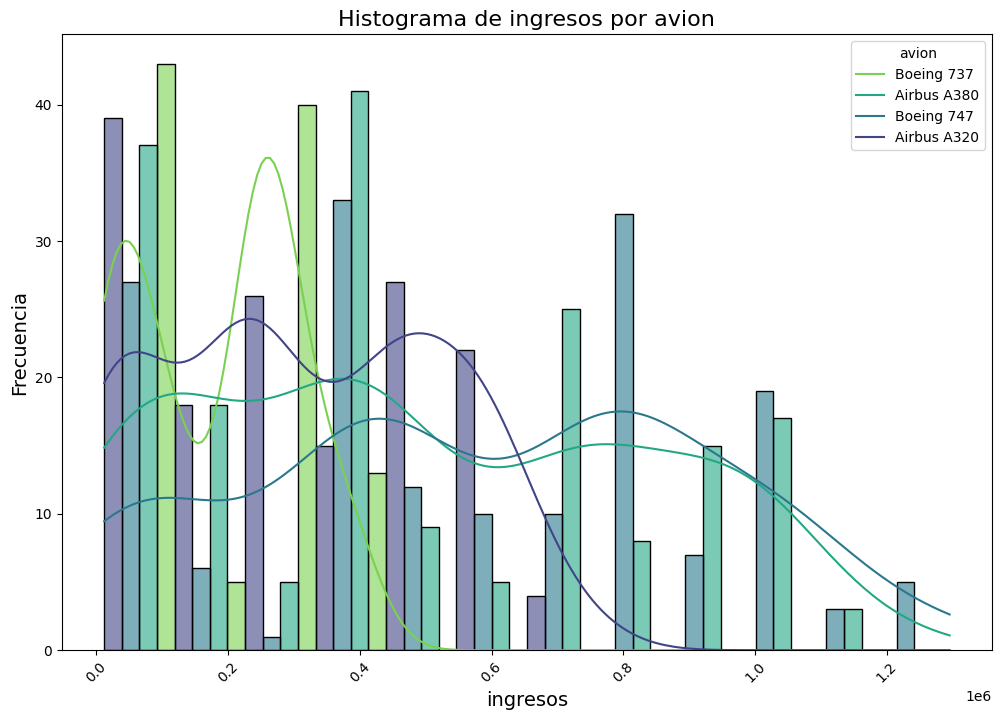

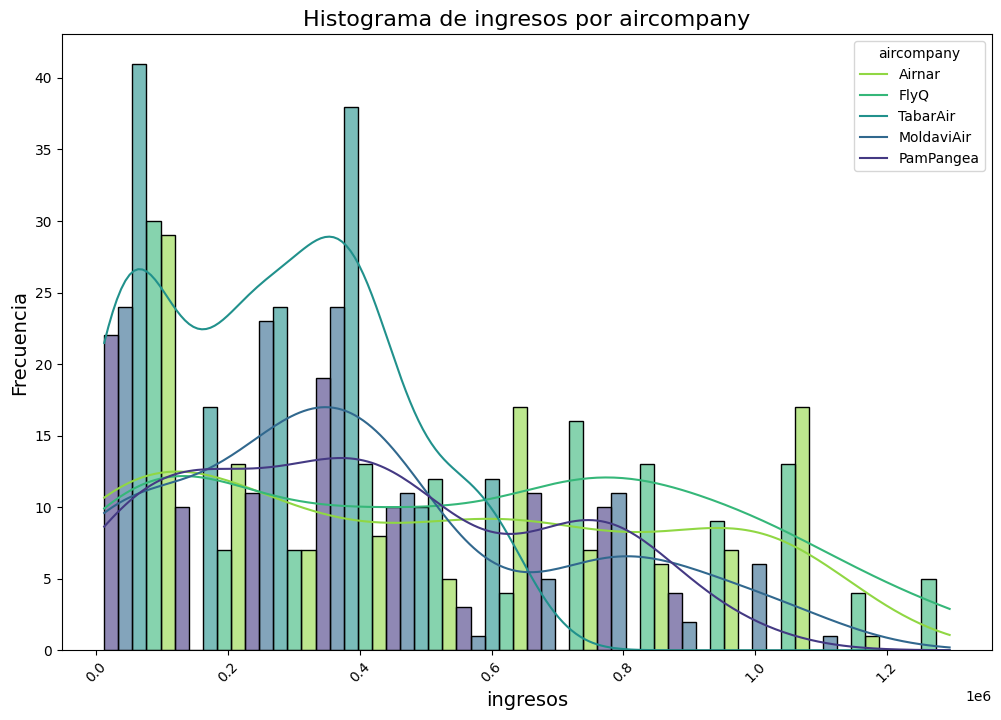

['avion', 'aircompany']

In [74]:
plot_features_cat_regression(df2, "ingresos",[ 'avion', 'aircompany'], with_individual_plot=True )

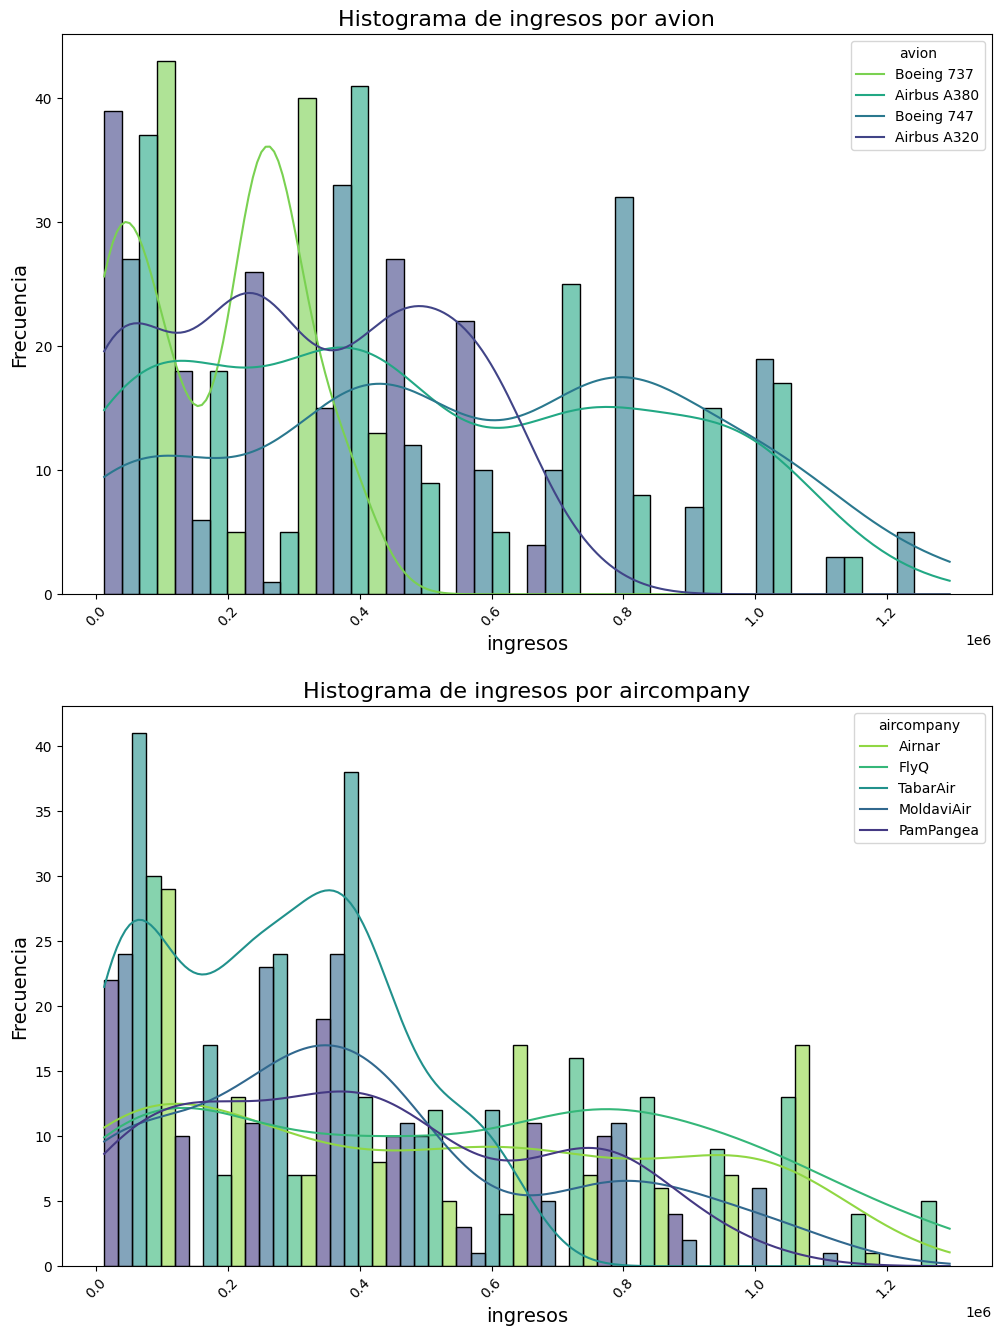

['avion', 'aircompany']

In [75]:
#PRUEBA: INFORME CONJUNTO
plot_features_cat_regression(df2, "ingresos",[ 'avion', 'aircompany'], with_individual_plot=False )

### Consejos para la distribución del trabajo

Tened en cuenta que hay realmente dos trabajos: desarrollo de las funciones, desarrollo del ejemplo.

Diseñad entre todos el ejemplo (puede ser un dataset conocido al que vais a aplicar todas las funciones, en cuyo caso deberías ir saber que debería devolver cada función). Basícamente esto sería diseñar lo que se conocen como "Test" de las funciones.function

Encargad a uno el desarrollo y ejecución del test y el resto repartíos las funciones. A medida que vayáis teniendo las funciones hechas avisad al "testador" para que pueda ir probándolas y dando feedback. El testador mientras las funciones llegan puede diseñar el esqueleto y unas funciones dummies que se llamen igual que las pedidas y que devuelvan siempre un mismo resultado (ojo un resultado válido para lo que se le pide a cada función)

